<a href="https://colab.research.google.com/github/Notfamousyet/DataScience/blob/main/netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("/content/mymoviedb.csv",engine='python',encoding='utf-8')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%Y-%m-%d', errors='coerce')

In [6]:
df.isnull().sum()

,0
Release_Date,10
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [7]:
df.drop_duplicates(inplace =True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   object        
 5   Vote_Average       9826 non-null   object        
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 767.7+ KB


In [10]:
df['Popularity']=df['Popularity'].astype('int')
df['Vote_Count']=df['Vote_Count'].astype('int')
df['Vote_Average']=df['Vote_Average'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   int64         
 4   Vote_Count         9826 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 767.7+ KB


In [12]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,39.828007,1392.943721,6.439467
min,1902-04-17 00:00:00,13.000000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.000000,146.000000,5.900000
50%,2011-09-12 00:00:00,21.000000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.000000,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.000000,31077.000000,10.000000
std,NaN,108.879786,2611.303856,1.129797


In [13]:
# Convert 'Release_Date' to datetime, handling errors by setting invalid dates to NaT
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Remove rows with invalid 'Release_Date' values (NaT)
df.dropna(subset=['Release_Date'], inplace=True)

# Now you should be able to access the year
df['Release_Year'] = df['Release_Date'].dt.year

In [14]:
df.shape

(9826, 10)

In [15]:
df['Release_Year'].dtype

dtype('int32')

In [16]:
col=['Release_Date','Overview','Original_Language','Poster_Url']
df.drop(col,axis=1,inplace=True)

In [17]:
def cat_col(df,col,labels):
    # Only calculate describe() statistics if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        desc=df[col].describe()
        edges=[
               desc['min'],
               desc['25%'],
               desc['50%'],
                desc['75%'],
                desc['max']]
        df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop',include_lowest=True)
    else:
        # If the column is already categorical, do nothing
        print(f"Column '{col}' is already categorical or non-numeric, skipping categorization.")
    return df

In [18]:
labels=['not_popular','below_avg','average','popular']
cat_col(df,'Vote_Average',labels)


,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618,122,below_avg,Thriller,2022
3,Encanto,2402,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895,1793,average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...
9832,Badlands,13,896,popular,"Drama, Crime",1973
9833,Violent Delights,13,8,not_popular,Horror,2020
9834,The Offering,13,94,not_popular,"Mystery, Thriller, Horror",2016
9835,The United States vs. Billie Holiday,13,152,average,"Music, Drama, History",2021


In [19]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [20]:
df.isnull().sum()

,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [23]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618,122,below_avg,Thriller,2022
3,Encanto,2402,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895,1793,average,"Action, Adventure, Thriller, War",2021


In [24]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()


,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083,8940,popular,Science Fiction,2021
3,The Batman,3827,1151,popular,Crime,2022
4,The Batman,3827,1151,popular,Mystery,2022


In [25]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25792 non-null  object  
 1   Popularity    25792 non-null  int64   
 2   Vote_Count    25792 non-null  int64   
 3   Vote_Average  25792 non-null  category
 4   Genre         25792 non-null  category
 5   Release_Year  25792 non-null  int32   
dtypes: category(2), int32(1), int64(2), object(1)
memory usage: 756.6+ KB


In [27]:
sns.set_style('whitegrid')

**Q1. What is most frequent genre in the dataset?**

In [28]:
df['Genre'].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


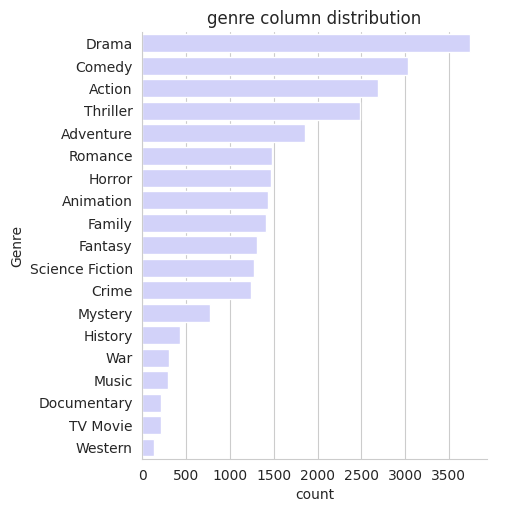

In [29]:
sns.catplot(y='Genre',data =df,kind='count',order=df['Genre'].value_counts().index,color='#CCCCFF')
plt.title('genre column distribution')
plt.show()

**Q2. What genres has highest votes?**

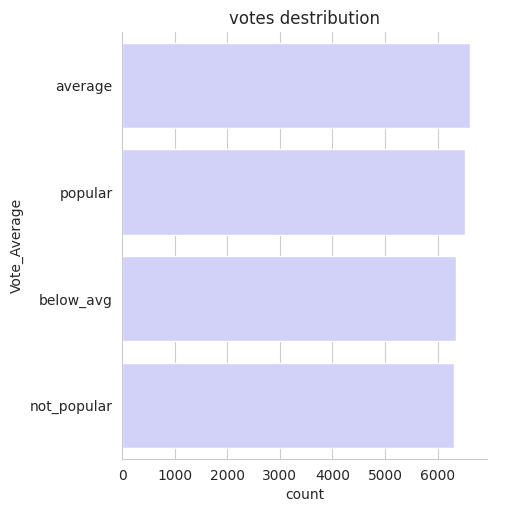

In [30]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#CCCCFF')
plt.title('votes destribution')
plt.show()

Q3. What movie got the highest popularity what's its genre?

In [31]:
df[df['Popularity']==df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083,8940,popular,Science Fiction,2021


**Q4. What movie got the lowest popularity? whats its genre?**

In [32]:
df[df['Popularity']==df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
24149,The Story of Star Wars,13,19,average,Documentary,2004
24150,Terra Formars,13,117,not_popular,Action,2016
24151,Terra Formars,13,117,not_popular,Horror,2016
24152,Terra Formars,13,117,not_popular,Science Fiction,2016
24153,Haikyuu!! Movie 2: Winners and Losers,13,16,popular,Animation,2015
...,...,...,...,...,...,...
25787,The United States vs. Billie Holiday,13,152,average,Drama,2021
25788,The United States vs. Billie Holiday,13,152,average,History,2021
25789,Threads,13,186,popular,War,1984
25790,Threads,13,186,popular,Drama,1984


**Q5. Which year has the most filmmed movies?**

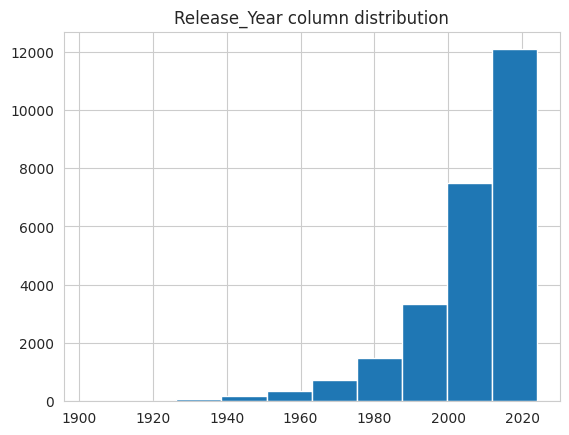

In [35]:
df['Release_Year'].hist()
plt.title('Release_Year column distribution')
plt.show()